# SciPy - Library of scientific algorithms for Python

In [ ]:
%pip install -q scipy ipympl

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

## Introduction

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Each of these submodules provides a number of functions and classes that can be used to solve problems in their respective topics.

In this lecture we will look at how to use some of these subpackages.

To access the SciPy package in a Python program, we start by importing everything from the `scipy` module.

## Special functions

A large number of mathematical special functions are important for many computional physics problems. SciPy provides implementations of a very extensive set of special functions. For details, see the list of functions in the reference documention at http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

To demonstrate the typical usage of special functions we will look in more detail at the Bessel functions:

In [1]:
#
# The scipy.special module includes a large number of Bessel-functions
# Here we will use the functions jn and yn, which are the Bessel functions 
# of the first and second kind and real-valued order. We also include the 
# function jn_zeros and yn_zeros that gives the zeroes of the functions jn
# and yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

/Users/ahmed/opt/anaconda3/envs/myenvconda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
n = 0    # order
x = 0.0

# Bessel function of first kind
print (f"J_{n}({x}) = {jn(n, x)}")

x = 1.0
# Bessel function of second kind
print (f"Y_{n}({x}) = {yn(n,x)}")

J_0(0.0) = 1.0
Y_0(1.0) = 0.08825696421567697


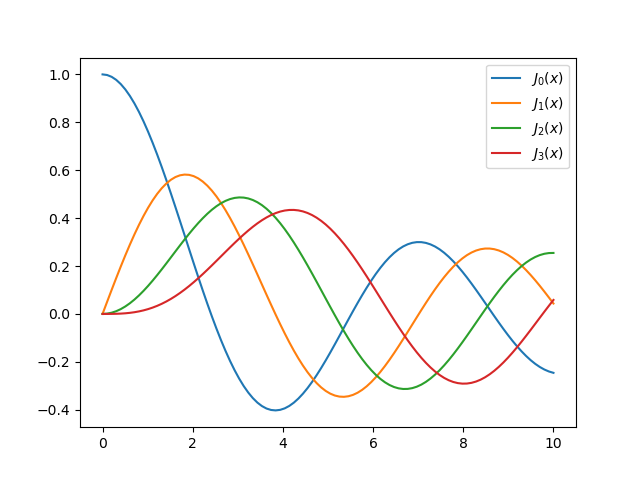

In [5]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=f"$J_{n}(x)$")
ax.legend();
plt.show()

In [6]:
# zeros of Bessel functions
n = 0 # order
m = 4 # number of roots to compute
jn_zeros(n, m)

array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444])

## Integration

### Numerical integration: quadrature

Numerical evaluation of a function of the type

$\displaystyle \int_a^b f(x) dx$

is called *numerical quadrature*, or simply *quadature*. SciPy provides a series of functions for different kind of quadrature, for example the `quad`, `dblquad` and `tplquad` for single, double and triple integrals, respectively.



In [7]:
from scipy.integrate import quad, dblquad, tplquad

The `quad` function takes a large number of optional arguments, which can be used to fine-tune the behaviour of the function (try `help(quad)` for details).

The basic usage is as follows:

In [8]:
# define a simple function for the integrand
def f(x):
    return x

In [9]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

print(f"integral value ={val}, absolute error ={abserr}")

integral value =0.5, absolute error =5.551115123125783e-15


If we need to pass extra arguments to integrand function we can use the `args` keyword argument:

In [10]:
def integrand(x, n):
    """
    Bessel function of first kind and order n. 
    """
    return jn(n, x)


x_lower = 0  # the lower limit of x
x_upper = 10 # the upper limit of x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,),)

print(val, abserr)

0.7366751370811073 9.389126882496403e-13


We can also handle infinite bounds (To a degree) we can see how well this matches an analytical solution for $ e^{-x^2} $

In [11]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -np.inf, np.inf)

print (f"numerical  = {val} {abserr}")

analytical = np.sqrt(np.pi)
print(f'analytical = {analytical}')

numerical  = 1.7724538509055159 1.4202636780944923e-08
analytical = 1.7724538509055159


As show in the example above, we can also use 'Inf' or '-Inf' as integral limits.

Higher-dimensional integration works in the same way:

In [12]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print(val, abserr )

0.7853981633974476 1.3753098510218528e-08


In [15]:
x = np.linspace(0,100,1000)
y = np.exp(-x**2)

dx = np.gradient(x)[0]


Note how we had to pass lambda functions for the limits for the y integration, since these in general can be functions of x.

In [17]:
from scipy.integrate import trapezoid, simpson, romb

trapezoid(y, x)

0.8862269254527579

## Ordinary differential equations (ODEs)

SciPy provides an API based on the function `solve_ivp` function to solve ordinary differential equations

In [18]:
from scipy.integrate import solve_ivp

A system of ODEs are usually formulated on standard form before it is attacked numerically. The standard form is:

$y' = f(y, t)$

where 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

and $f$ is some function that gives the derivatives of the function $y_i(t)$. To solve an ODE we need to know the function $f$ and an initial condition, $y(0)$.

Note that higher-order ODEs can always be written in this form by introducing new variables for the intermediate derivatives.

Once we have defined the Python function `f` and array `y_0` (that is $f$ and $y(0)$ in the mathematical formulation), we can use the `solve_ivp` function as:

    y_t = odeint(f, y_0, t)

where `t` is and array with time-coordinates for which to solve the ODE problem. `y_t` is an array with one row for each point in time in `t`, where each column corresponds to a solution `y_i(t)` at that point in time. 

We will see how we can implement `f` and `y_0` in Python code in the examples below.

#### Example: double pendulum

Let's consider a physical example: The double compound pendulum, described in some detail here: http://en.wikipedia.org/wiki/Double_pendulum

In [19]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

The equations of motion of the pendulum are given on the wiki page:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

To make the Python code simpler to follow, let's introduce new variable names and the vector notation: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [20]:
g = 9.82
L = 0.5
m = 0.1

def dx(t, x):
    """
    The right-hand side of the pendulum ODE
    """
    
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 * np.cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * np.cos(x1-x2) * x3)/(16 - 9 * np.cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * np.sin(x1-x2) + 3 * (g/L) * np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1-x2) + (g/L) * np.sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [21]:
# choose an initial state
x0 = [np.pi/4, np.pi/2, 0, 0]

In [22]:
# time coodinate to solve the ODE for: from 0 to 10 seconds
t = np.linspace(0, 10, 250)

In [26]:
# solve the ODE problem
x = solve_ivp(dx,[0,10], x0, t_eval=t)
y = x.y

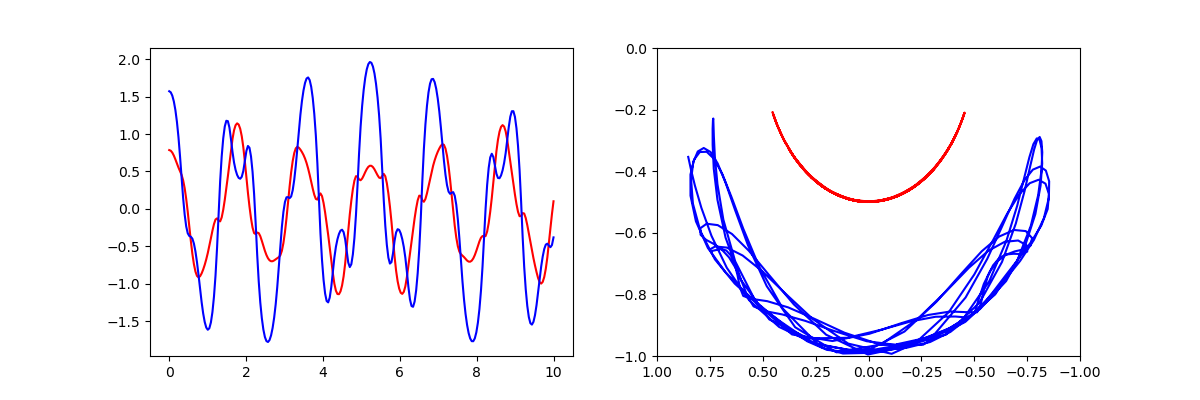

In [27]:
# plot the angles as a function of time

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, y[0,:], 'r', label="theta1")
axes[0].plot(t, y[1,:], 'b', label="theta2")


x1 = + L * np.sin(y[0,:])
y1 = - L * np.cos(y[0,:])

x2 = x1 + L * np.sin(y[1,:])
y2 = y1 - L * np.cos(y[1,:])
    
axes[1].plot(x1, y1, 'r', label="pendulum1")
axes[1].plot(x2, y2, 'b', label="pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

#### Example: Damped harmonic oscillator

ODE problems are important in computational physics, so we will look at one more example: the damped harmonic oscillation. This problem is well described on the wiki page: http://en.wikipedia.org/wiki/Damping

The equation of motion for the damped oscillator is:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

where $x$ is the position of the oscillator, $\omega_0$ is the frequency, and $\zeta$ is the damping ratio. To write this second-order ODE on standard form we introduce $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

In the implementation of this example we will add extra arguments to the RHS function for the ODE, rather than using global variables as we did in the previous example. As a consequence of the extra arguments to the RHS, we need to pass an keyword argument `args` to the `odeint` function:

In [ ]:
def dy(t,y, zeta, w0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [ ]:
# initial state: 
y0 = [1.0, 0.0]

In [ ]:
# time coodinate to solve the ODE for
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0

In [ ]:
# solve the ODE problem for three different values of the damping ratio

y1 = solve_ivp(dy,[0,10], y0, args=(0.0, w0), t_eval=t) # undamped
y2 = solve_ivp(dy,[0,10], y0, args=(0.2, w0), t_eval=t) # under damped
y3 = solve_ivp(dy,[0,10], y0, args=(1.0, w0), t_eval=t) # critial damping
y4 = solve_ivp(dy,[0,10], y0, args=(5.0, w0), t_eval=t) # over damped

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, y1.y[0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2.y[0], 'r', label="under damped")
ax.plot(t, y3.y[0], 'b', label="critical damping")
ax.plot(t, y4.y[0], 'g', label="over damped")
ax.legend();

## Interpolation

Scipy has various interpolation functions that can be used to approximate values inbetween datapoints

In [ ]:
from scipy.interpolate import interp1d

In [2]:
def f(x):
    return np.sin(x)

In [3]:
n = np.arange(0, 10)  
x = np.linspace(0, 14, 100)

y_meas = f(n) + 0.1 * np.random.randn(n.shape[0]) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas, bounds_error=False,fill_value='extrapolate' )

NameError: name 'np' is not defined

In [4]:
n, y_meas

NameError: name 'n' is not defined

In [5]:
linear_interpolation(11)

NameError: name 'linear_interpolation' is not defined

In [ ]:

y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic', bounds_error=False,fill_value='extrapolate' )
y_interp2 = cubic_interpolation(x)

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests. For a complete documentation of its features, see http://docs.scipy.org/doc/scipy/reference/stats.html.

There is also a very powerful python package for statistical modelling called statsmodels. See http://statsmodels.sourceforge.net for more details.

In [ ]:
from scipy import stats

In [ ]:
# create a (discrete) random variable with Poissonian distribution

X = stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

In [ ]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the cumulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

In [ ]:
X.rvs

In [ ]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

In [ ]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the cumulative distribution function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Statistics:

In [ ]:
X.mean(), X.std(), X.var() # Poisson distribution

In [ ]:
Y.mean(), Y.std(), Y.var() # normal distribution

### Statistical tests

Test if two sets of (independent) random data come from the same distribution:

In [ ]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print (f"t-statistic ={t_statistic}")
print (f"p-value ={p_value}")

Since the p value is very large we cannot reject the hypothesis that the two sets of random data have *different* means.

To test if the mean of a single sample of data has mean 0.1 (the true mean is 0.0):

In [ ]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Low p-value means that we can reject the hypothesis that the mean of Y is 0.1.

In [ ]:
Y.mean()

In [ ]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

## Further reading

* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 